# Regresie Logistică

Tudor Berariu - 2018

Alexandru Sorici - 2024

In [40]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Scopul Laboratorului

Scopul laboratorului îl reprezintă înțelegerea algoritmului de **regresie logistică** și a rezolvării unei probleme de clasificare prin aplicarea principiului de **estimare a verosimilității maxime (eng. Maximum Likelihood Estimation)**.
De asemenea, vom aplica **metoda scăderii gradientului (eng. gradient descent)** pentru a rezolva o problemă de minimizare.

Regresia logistică este aplicabilă atunci când dorim să rezolvăm o problemă de **clasificare** (în mod standard **binară**, dar metoda poate fi extinsă și pentru caz multinomial). 

Variabilele folosite în predicție (peste care se aplică regresia) pot fi:
  - variabile continue (date numerice)
  - variabile discrete nominale, i.e. date care provin din niște categorii cu un domeniu de valori finit (e.g. culoarea parului, zilele saptamanii)
  - variabile discrete ordinale, i.e. date care suportă o relație de ordine (e.g. numarul de stelute la o recenzie de produs)
  
 **Ipoteza de învățare** este că variabilele de predicție se află într-o relație **liniară** cu "**log odds**" al varibilei dependente (cea pe care dorim să o clasificăm binar).
 

$$p = P(y=1 \vert {\bf x}; {\bf \theta})$$
$$l = ln(\frac{p}{1-p}) = w_0 + w_1 x_1 + \cdots + w_n x_n $$

Rezultă că **probabilitatea** $p$, ca un exemplu să facă parte din clasa "pozitivă" este modelată cu ajutorul funcției logistice $\sigma(a) = \frac{1}{1+e^{-a}}$ 

$$p = \frac{1}{1+ e^{-(w_0 + w_1 x_1 + \cdots + w_n x_n)}}$$

![sigmoid function](res/sigmoid.png)

## 2. Maximum Likelihood Estimation (MLE) pentru Regresie Logistică 

Se dă setul de date (**X**, **t**) constând dintr-o mulțime **X** de N eșantioane de dimensiune D (i.e. fiecare ${\bf x^{(i)}} \in {\bf X}$ este de forma ${\bf x} = (x_1, x_2, ..., x_D)$) (fiecare eșantion are D atribute).
Pentru fiecare ${\bf x}^{(n)} \in X$ exista un $t^{(n)} \in {0, 1}$, reprezentând **clasa** din care face parte exemplul ${\bf x}^{(n)}$.

Predictia data de regresia logistică pentru $x^{(n)}$ este $y^{(n)} = \sigma({\bf w^T x^{(n)}} )$

Astfel, rezulta setul de date $\{{\bf X}, {\bf t}\}$ pentru care vom formula expresia de Maximum Likelihood al datelor ca:

$$p({\bf t} \vert {\bf w}) = \prod_{n=1}^{N}{y^{(n)}}^{t^{(n)}}(1 - y^{(n)})^{1-t^{(n)}}$$

Pentru stabilitate numerica, in loc de **maximizarea** MLE-ului, vom logaritma expresia si vom **minimiza** media pentru **negative log likelihood (NLL)**.

$$J({\bf w}) = -\frac{1}{N} ln(p({\bf t} \vert {\bf w})) = - \frac{1}{N} \sum_{n=1}^{N} \left[t^{(n)}ln(y^{(n)}) + (1-t^{(n)})ln(1 - y^{(n)})\right]$$

## 3. Minimizarea folosind metoda scăderii gradientului

Algoritmul de minimizare a unei functii obiectiv $J({\bf w})$ folosind scaderea gradientului are forma urmatoare:

<!-- ![gradient descent](img/alg-gradient-descent.png) -->
**Procedura Scăderii Gradientului**
  - intrări: 
    - ${\bf w}_{init}$ - ponderi inițializate aleator dintr-o distribuție normala $N(\mu=0, \Sigma=I)$ 
    - $\alpha$ (rata de învățare)
    - nr\_epoci - numărul de epoci de antrenare
  - ieșiri:
    - ${\bf w^*}$ - ponderi care minimizează funcția de eroare $J({\bf w})$ 

1. ${\bf w_0}$ = ${\bf w}_{init}$
2. $t$ = 1
3. **cât timp** $t$ < nr\_epoci:
4. &nbsp;&nbsp;&nbsp;&nbsp; ${\bf w}_t \leftarrow {\bf w}_{t-1} - \alpha \nabla_{\bf w} J({\bf w})$
5. &nbsp;&nbsp;&nbsp;&nbsp; $t \leftarrow t+1 $ 


unde gradientul functiei $J({\bf w})$ este:
    
$$\nabla_{\bf w} J({\bf w}) = \frac{1}{N}\sum_{n=1}^{N} (y^{(n)} - t^{(n)}) {\bf x}^{(n)} = \frac{1}{N} {\bf X^T} \cdot ({\bf y - t})$$

în care operația $\cdot$ este înmulțire punct-cu-punct (`numpy.dot`), iar $\alpha$ este **rata de invățare** care controlează "lungimea" pasului în direcția opusă gradientului.

## 4. Setul de date

In [42]:
def two_clusters(N, variance=0.1):
    N1 = N // 2
    N2 = N - N1
    X1 = np.random.randn(N1, 2) * variance + 0.25
    X2 = np.random.randn(N2, 2) * variance + 0.75
    X = np.concatenate([X1, X2], axis=0)
    T = np.concatenate([np.zeros((N1)), np.ones((N2))], axis=0)
    p = np.random.permutation(N)
    return X[p], T[p]

In [43]:
def visualize_dataset(X, T, Y=None, w=None, other_w=None):
    m = ["x", "o"]  # Indicates true class
    col = ["red", "blue"]  # Indicates prediction
    fig = plt.figure(); plt.axis('equal')
    if Y is not None:
        idx_tp = np.logical_and(T >= .5, Y >= .5) # True positives
        idx_fp = np.logical_and(T < .5, Y >= .5) # False positives
        idx_fn = np.logical_and(T >= .5, Y < .5) # False negatives
        idx_tn = np.logical_and(T < .5, Y < .5) # True negatives
        
        plt.scatter(X[idx_tp,0], X[idx_tp,1], marker=m[0], c="red", label="TP")
        plt.scatter(X[idx_fp,0], X[idx_fp,1], marker=m[1], c="red", label="FP")
        plt.scatter(X[idx_fn,0], X[idx_fn,1], marker=m[0], c="blue", label="FN")
        plt.scatter(X[idx_tn,0], X[idx_tn,1], marker=m[1], c="blue", label="TN")

    else:
        idx_pos, idx_neg = (T > .5), (T < .5)
        plt.scatter(X[idx_pos,0], X[idx_pos,1], marker=m[0], color="blue", label="Pos")
        plt.scatter(X[idx_neg,0], X[idx_neg,1], marker=m[1], color="blue", label="Neg")
    
    if w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -w[0] / w[1] * __x - w[2] / w[1]
        plt.plot(__x, __y, color="black")

    if other_w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -other_w[0] / other_w[1] * __x - other_w[2] / other_w[1]
        plt.plot(__x, __y, color="orange")

    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.show()

In [44]:
def split_dataset(X, T, train=.8):
    N = X.shape[0]
    N_train = int(round(N * train))
    N_test = N - N_train

    X_train, X_test = X[:N_train,:], X[N_train:,:]
    T_train, T_test = T[:N_train], T[N_train:]
    return X_train, T_train, X_test, T_test


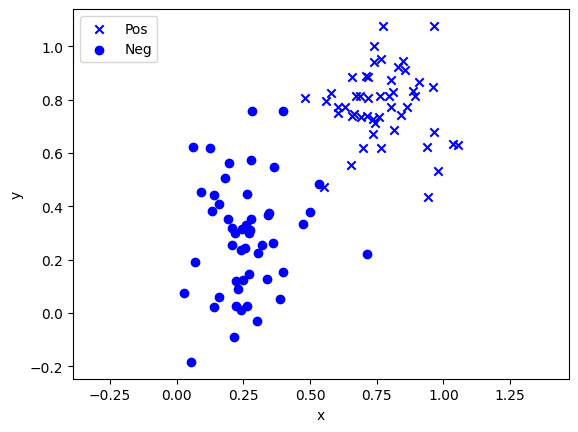

In [45]:
X, T = two_clusters(100, variance=0.15)
visualize_dataset(X, T, Y=None)

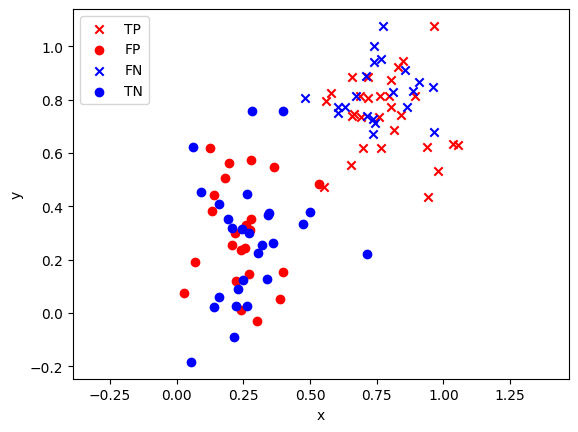

In [46]:
visualize_dataset(X, T, Y=np.random.uniform(size=T.size))

### Setul de date extins

Dorim sa testam robustetea regresiei logistice la adaugarea unor exemple extreme din clasa pozitivă.

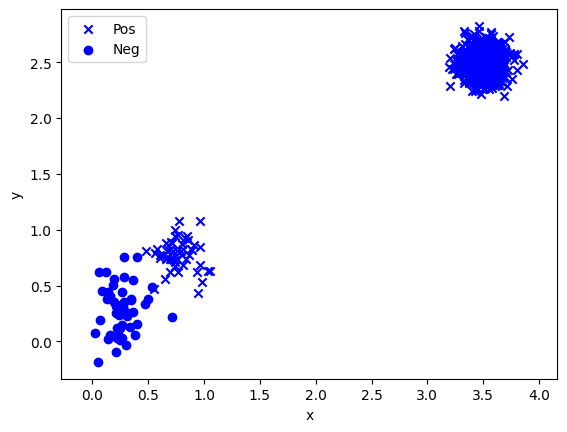

In [47]:
extra_N = 800
extra_X = np.random.randn(extra_N, 2) * 0.1
extra_X[:,1] += 2.5
extra_X[:,0] += 3.5
extra_T = np.ones(extra_N)
X_extended = np.concatenate([X, extra_X], axis=0)
T_extended = np.concatenate([T, extra_T], axis=0)

visualize_dataset(X_extended, T_extended, Y=None)

## 5.1 - Cerinta 1: Implementarea functiei de sigmoida logistica

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


In [48]:
# TODO <1>: Implementati functia de sigmoida logistica
def logistic(x):
    # TODO: Inlocuiti aici cu expresia functiei de sigmoida logistica
    # Atentie: x poate fi un vector numpy, deci operatiile trebuie facute pe vectori
    # return np.zeros_like(x)  
    return 1 / (1 + np.exp(-x))

Logistic looks ok


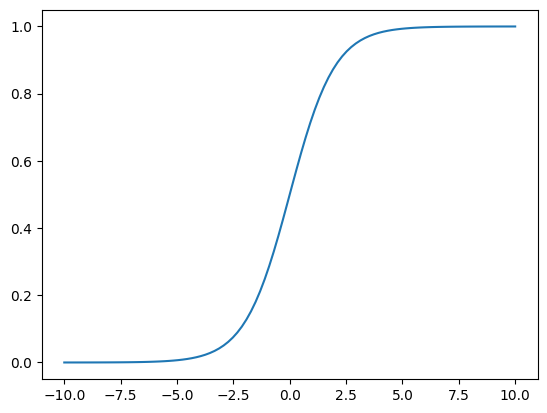

In [49]:
# Test for the logistic function
x = np.linspace(-10, 10, 100)
expected_output = np.array(
  [4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
 1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
 2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
 5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
 1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
 2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
 5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
 1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
 2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
 6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
 1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
 2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
 4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
 6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
 7.88036666e-01, 8.19823407e-01, 8.47764177e-01, 8.72048295e-01,
 8.92947854e-01, 9.10782940e-01, 9.25893264e-01, 9.38616893e-01,
 9.49275639e-01, 9.58166060e-01, 9.65554804e-01, 9.71677118e-01,
 9.76737464e-01, 9.80911458e-01, 9.84348514e-01, 9.87174790e-01,
 9.89496155e-01, 9.91401013e-01, 9.92962885e-01, 9.94242714e-01,
 9.95290886e-01, 9.96148968e-01, 9.96851186e-01, 9.97425690e-01,
 9.97895596e-01, 9.98279874e-01, 9.98594080e-01, 9.98850958e-01,
 9.99060945e-01, 9.99232587e-01, 9.99372875e-01, 9.99487531e-01,
 9.99581233e-01, 9.99657809e-01, 9.99720385e-01, 9.99771521e-01,
 9.99813307e-01, 9.99847452e-01, 9.99875353e-01, 9.99898151e-01,
 9.99916780e-01, 9.99932002e-01, 9.99944439e-01, 9.99954602e-01])
output = logistic(x)
assert np.allclose(output, expected_output), "Logistic function does not match expected values"
print("Logistic looks ok")

plt.figure()
plt.plot(x, output)
plt.show()

## 5.2 - Cerinta 2: Definirea funcției de eroare și a metricii de performanță
Funcția de eroare ce trebuie minimizată în regresia logistică este **Negative Log Likelihood**:


$$J({\bf w}) = -\frac{1}{N} ln(p({\bf t} \vert {\bf w})) = - \frac{1}{N} \sum_{n=1}^{N} \left[t^{(n)}ln(y^{(n)}) + (1-t^{(n)})ln(1 - y^{(n)})\right]$$

In [50]:
# TODO <2.1>: Implementati expresia pentru Negative Log Likelihood - functia J(w), unde Y este predictia data de modelul logistic, 
# iar T sunt etichetele de clasa pentru cele N exemple din setul de date
def nll(Y, T):
    N = T.shape[0]

    # TODO: Inlocuiti aici cu expresia functiei de Negative Log Likelihood
    # Hint: folositi notiunea de indexare logica din numpy si faptul ca T poate fi 0 sau 1
    return -np.sum(T * np.log(Y) + (1 - T) * np.log(1 - Y)) / N

In [51]:
# Test the nll function
predictions = np.array([0.8, 0.2, 0.6, 0.4, 0.9, 0.3, 0.7, 0.1, 0.5, 0.8])
targets = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Calculate NLL
nll_value = nll(predictions, targets)

# Check if the value is correct
if np.isclose(nll_value, 0.4694594362347564):
    print("NLL looks ok")
else:
    print("NLL is incorrect")


NLL looks ok


**Metrica de performanță** este **acuratețea**, care întoarce **o medie** a exemplelor din setul de date clasificate corect.

$$ acc = \frac{1}{N} \sum_{i=1}^N eval(y^{(i)}, t^{(i)}) $$

Unde $eval(y^{(i)}, t^{(i)})$ întoarce `1` dacă:
  - pentru $t^{(n)}$ = 1, $y^{(n)} \geq 0.5$
  - pentru $t^{(n)}$ = 0, $y^{(n)} \lt 0.5$

și `0` altfel.

In [52]:
# TODO <2.2>: Implementati expresia care intoarce acuratetea clasificarii
def accuracy(Y, T):
    N = Y.shape[0]

    # TODO: Inlocuiti aici cu expresia functiei de acuratete
    # Hint: folositi notiunea de indexare logica din numpy si faptul ca 
    #       in numpy True este echivalent cu 1 si False cu 0

    num_correct = np.sum(np.round(Y) == T)

    return num_correct / N

In [53]:
# Test the accuracy function
predictions = np.array([0.2, 0.8, 0.6, 0.4, 0.4, 0.3, 0.7, 0.1, 0.6, 0.2])
target = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

expected_accuracy = 0.8
computed_accuracy = accuracy(predictions, target)

if np.isclose(computed_accuracy, expected_accuracy):
    print("Accuracy looks ok")
else:
    print("Accuracy is incorrect")


Accuracy looks ok


## 5.3 - Cerința 3 - Antrenarea modelului logistic și utilizarea modelului (predicția)
Predicția unui model logistic este dată de aplicarea funcției de **sigmoidă logistică** peste produsul scalar al fiecărui exemplu ${\bf x}^{(i)}$ cu ponderile ${\bf w}$. 

$$y^{(i)} = logistic({\bf x}^{(i)} \cdot {\bf w})$$

Funcția `predict_logistic` întoarce predicțiile ${\bf y}$ pentru toate exemplele din setul de date ${\bf X}$.

In [54]:
def predict_logistic(X, w):
    # TODO <3.1> : Calculati predictia Y a modelului logistic antrenat (ponderile w invatate)
    # Hint: urmariti explicatiile de utilizare ale functiei `numpy.dot` pentru a putea calcula 
    # produsele scalare intre toti vectorii x^(i) si ponderile w intr-un singur apel
    # N = X.shape[0]
    Z = np.dot(X, w)
    Y = logistic(Z)
    return Y

In [55]:
# Test the predict_logistic function
X = np.array([[0.1, 0.2, 1], [0.2, 0.3, 1], [0.3, 0.4, 1], [0.4, 0.5, 1], [0.5, 0.6, 1],
              [0.6, 0.7, 1], [0.7, 0.8, 1], [0.8, 0.9, 1], [0.9, 1.0, 1], [1.0, 1.1, 1]])
w = np.array([0.1, 0.2, 0.3])

predictions = predict_logistic(X, w)

# check if the predictions are correct
expected_predictions = np.array([0.58661758, 0.5938731,  0.60108788, 0.60825903, 0.61538376, 0.62245933, 0.62948311, 0.63645254, 0.64336515, 0.65021855])
if np.allclose(predictions, expected_predictions):
    print("predict_logistic looks ok")
else:
    print("predict_logistic is incorrect")

predict_logistic looks ok


Antrenarea și evaluarea modelului de regresie logistică se face prin funcția `train_and eval_logistic`, care execută `epochs_nr` pași ai algoritmului de scădere a gradientului, returnând ponderile antrenare ${\bf w}$, precum și un istoric al erorii și al acurateții pe seturile de date de antrenare și de test.

Metoda de scădere a gradientului execută operațiile:
1. $t$ = 1
2. **cât timp** $t$ < nr\_epoci:
3. &nbsp;&nbsp;&nbsp;&nbsp; ${\bf w}_t \leftarrow {\bf w}_{t-1} - \alpha \nabla_{\bf w} J({\bf w})$
4. &nbsp;&nbsp;&nbsp;&nbsp; $t \leftarrow t+1 $ 

unde gradientul functiei $J({\bf w})$ este:
    
$$\nabla_{\bf w} J({\bf w}) = \frac{1}{N}\sum_{n=1}^{N} (y^{(n)} - t^{(n)}) {\bf x}^{(n)} = \frac{1}{N} {\bf X^T} \cdot ({\bf y - t})$$

In [56]:
def train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=.01, epochs_no=100):
    # TODO <3.2> : Antrenati modelul logistic (ponderile W), executand epochs_no pasi din algoritmul de gradient descent
    # (N, D) = X.shape

    N_train = X_train.shape[0]
    N_test = X_test.shape[0]
    D = X_train.shape[1]
    
    # Initializare ponderi
    w = np.random.randn(D)
    
    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for epoch in range(epochs_no):
        # 1. Obtineti Y_train si Y_test folosind functia predict_logistic
        Y_train = predict_logistic(X_train, w)
        Y_test = predict_logistic(X_test, w)
        # 2. Adaugati acuratetea si negative log likelihood-ul pentru setul de antrenare si de testare 
        #    la fiecare pas; utilizati functiile accuracy si nll definite anterior
        train_acc.append(accuracy(Y_train, T_train))
        test_acc.append(accuracy(Y_test, T_test))
        train_nll.append(nll(Y_train, T_train))
        test_nll.append(nll(Y_test, T_test))
        # 3. Actualizati ponderile w folosind regula de actualizare a gradientului
        grad = np.dot(X_train.T, (Y_train - T_train)) / N_train
        w -= lr * grad

        # pass        

    return w, train_nll, test_nll, train_acc, test_acc

## 6. Testarea pe setul de date Two Clusters

In [57]:
def plot_evolution(train_acc, test_acc, train_nll, test_nll):
    epochs_no = len(train_acc)
    fig, (ax1, ax2) = plt.subplots(2,1)

    # Afisam cu verde acuratetea pe setul de antrenare si cu rosu acuratetea pe setul de testare
    ax1.plot(range(epochs_no), train_acc, label="Train Accuracy", color="green")
    ax1.plot(range(epochs_no), test_acc, label="Test Accuracy", color="red")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc='lower right', ncol=1)

    # Afisam cu verde NLL pe setul de antrenare si cu rosu NLL pe setul de testare
    ax2.plot(range(epochs_no), train_nll, label="Train NLL", color="green")
    ax2.plot(range(epochs_no), test_nll, label="Test NLL", color="red")
    ax2.set_xlabel("iteration")
    ax2.set_ylabel("NLL")
    ax2.legend(loc='upper right', ncol=1)
    
    plt.show()

Acuratete finala pe setul initial - train: 0.9625, test: 1.0


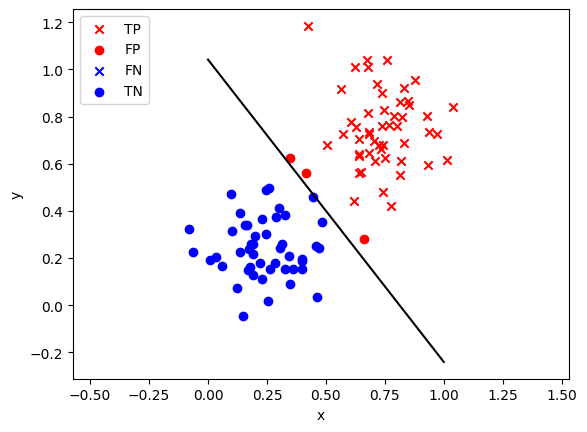

In [65]:
N_EPOCHS = 500  #@param {type: "slider", default: 500, min: 100, max: 1000}
N_POINTS = 100  #@param {type: "slider", default: 100, min: 50, max: 200}
VARIANCE = 0.15  #@param {type: "slider", default: 0.15, min: 0.0, max: 0.5}
X, T = two_clusters(N_POINTS, variance=VARIANCE)


# Adaugăm o coloană de 1-uri pentru bias in setul de date X
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

X_train, T_train, X_test, T_test = split_dataset(X, T, train=.8)

w, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=0.1, epochs_no=N_EPOCHS)

Y = predict_logistic(X, w)

print(f"Acuratete finala pe setul initial - train: {train_acc[-1]}, test: {test_acc[-1]}")

visualize_dataset(X, T, Y, w)

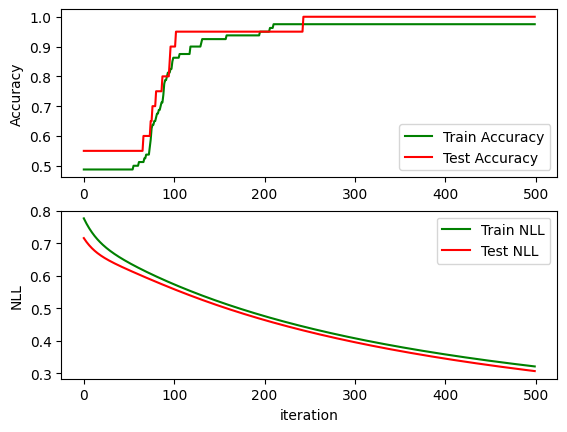

In [59]:
plot_evolution(train_acc, test_acc, train_nll, test_nll)

### 5.4 Testare pe setul de date Two Clusters Extins

In [60]:
extra_N = 800
extra_X = np.random.randn(extra_N, 2) * 0.1

# Adaugarea coordonatelor pentru termenul de bias
extra_X = np.concatenate([extra_X, np.ones((extra_N, 1))], axis=1)
extra_X[:,1] += 1.5
extra_X[:,0] += 3.5
extra_T = np.ones(extra_N)

# Adaugam datele noi la setul de date existent
X_extended = np.concatenate([X, extra_X], axis=0)
T_extended = np.concatenate([T, np.ones(extra_N)], axis=0)

# Le adaugam pe toate la setul de date de antrenare
X_train_extended = np.concatenate([X_train, extra_X], axis=0)
T_train_extended = np.concatenate([T_train, extra_T], axis=0)

Antrenăm și evaluăm regresia logistică pe **setul de date extins**. 

Graficul de vizualizare a rezultatului clasificării afișează cu o culoare portocalie dreapta de separație obținută după antrenarea pe setul de date **inițial**. 

Acuratete finala pe setul extins - train: 0.9670454545454545, test: 0.75


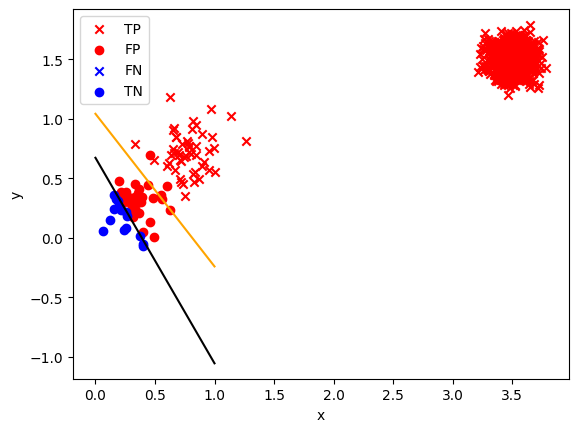

In [69]:
w_extended, train_nll_extended, test_nll_extended, train_acc_extended, test_acc_extended = train_and_eval_logistic(X_train_extended, T_train_extended, X_test, T_test, lr=0.1, epochs_no=N_EPOCHS)

Y_extended = predict_logistic(X_extended, w_extended)
print(f"Acuratete finala pe setul extins - train: {train_acc_extended[-1]}, test: {test_acc_extended[-1]}")
visualize_dataset(X_extended, T_extended, Y_extended, w=w_extended, other_w=w)

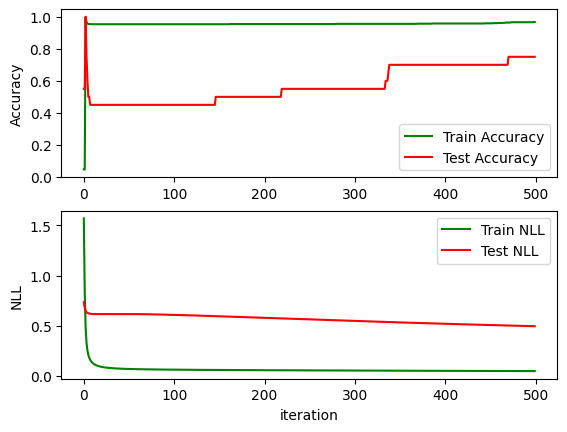

In [70]:
plot_evolution(train_acc_extended, test_acc_extended, train_nll_extended, test_nll_extended)

### 6. Analiză

1. Care este influența adăugăii punctelor pozitive extreme? Afectează ele rezultatul clasificării? Ce se observă în cazul rulării de mai multe ori a procesului de antrenare?
2. Putem folosi regresia liniară pentru a clasifica setul de date Two Clusters extins? Care ar fi rezultatul daca am face acest lucru?

In [63]:
1. Care este influența adăugăii punctelor pozitive extreme? 
Afectează ele rezultatul clasificării? 
Aparent da
Ce se observă în cazul rulării de mai multe ori a procesului de antrenare?
Rezultatele nu sunt constante

2. Putem folosi regresia liniară pentru a clasifica setul de date Two Clusters extins? Care ar fi rezultatul daca am face acest lucru?

SyntaxError: invalid syntax (3254455371.py, line 1)